# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

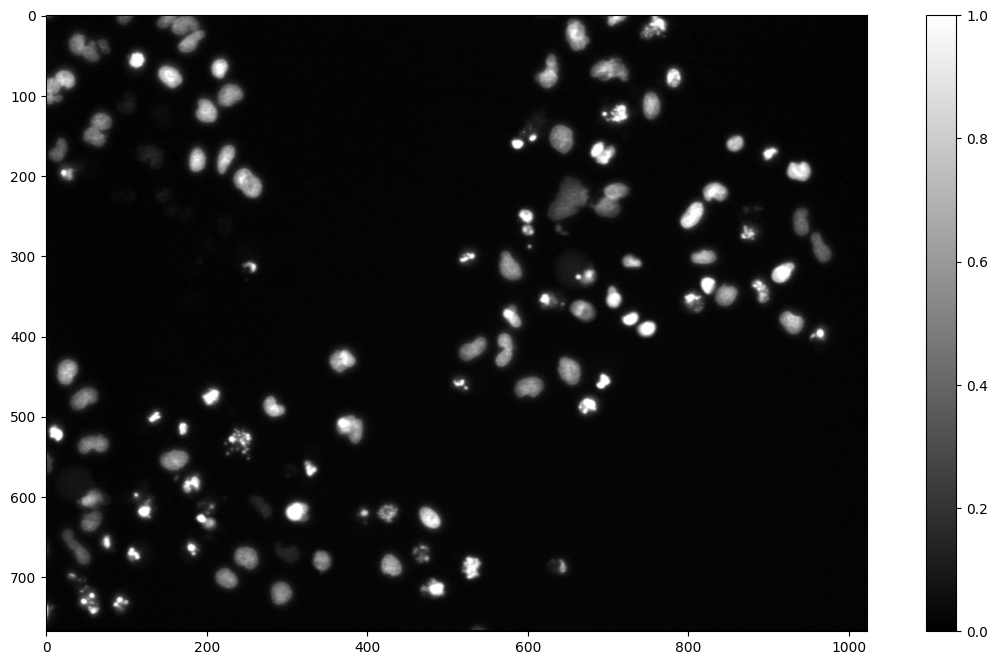

In [8]:
img = plt.imread("data/cells.png")
plt.figure(figsize=(15, 8))
plt.imshow(img, "gray")
plt.colorbar()



In [22]:
print(img.ndim)         #Image dimensions
print(img.shape[1])     #Image width
print(img.shape[0])     #Image height
img[2, 2]               #Intensity at position p(2,2)

2
1024
768


0.24313726

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

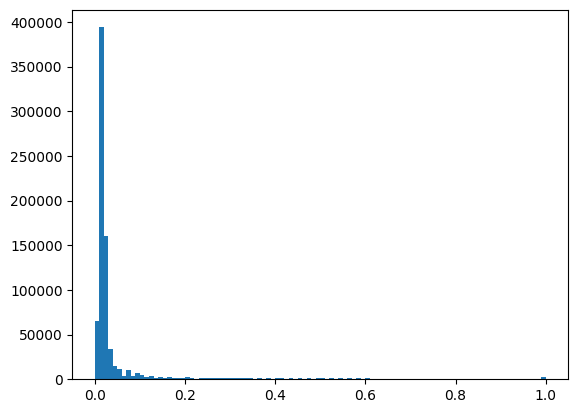

In [29]:
plt.hist(img.flatten(), bins=100)
plt.show()                  # Damit die Werte des Arrays nicht angezeigt werden.

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [30]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

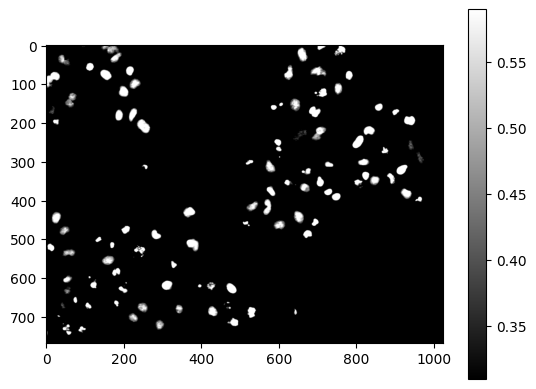

In [34]:
img_clipped = img.clip(T1, T2)
plt.figure()
plt.imshow(img_clipped, cmap='gray')
plt.colorbar()
plt.show()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

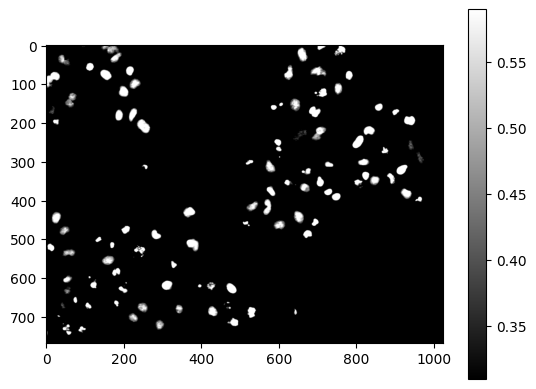

In [35]:
img_task3a = img.copy()
height = img_task3a.shape[0]
width = img_task3a.shape[1]

for r in range(height):
    for c in range(width):
        pixel_value = img_task3a[r, c]
        if pixel_value < T1:
            img_task3a[r, c] = T1
        elif pixel_value > T2:
            img_task3a[r, c] = T2

plt.figure()
plt.imshow(img_task3a, cmap="gray")
plt.colorbar()
plt.show()


**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

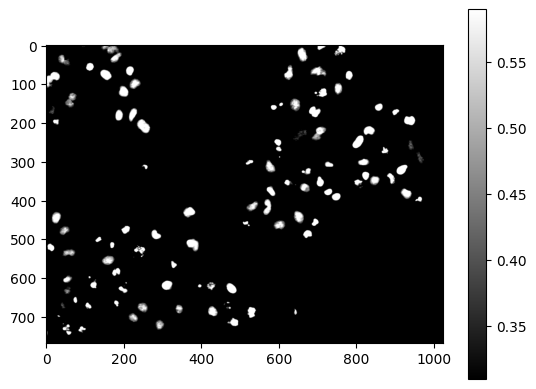

0.320685


In [38]:
img_task3b = img.copy()
for p in numpy.ndindex(img_task3b.shape):
    row = p[0]
    col = p[1]
    val = img_task3b[row, col]
    if val < T1:
        img_task3b[row, col] = T1
    elif val > T2:
        img_task3b[row, col] = T2

plt.figure()
plt.imshow(img_task3b, cmap="gray")
plt.colorbar()
plt.show()

print(img_task3b.mean())

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the `...` line with your code:

In [39]:
def clip_image(img_in, T1, T2):
    img_out = img_in.copy()
    for p in numpy.ndindex(img_out.shape):
        row = p[0]
        col = p[1]
        val = img_out[row, col]
        if val < T1:
            img_out[row, col] = T1
        elif val > T2:
            img_out[row, col] = T2

    return img_out

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img_in` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [40]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

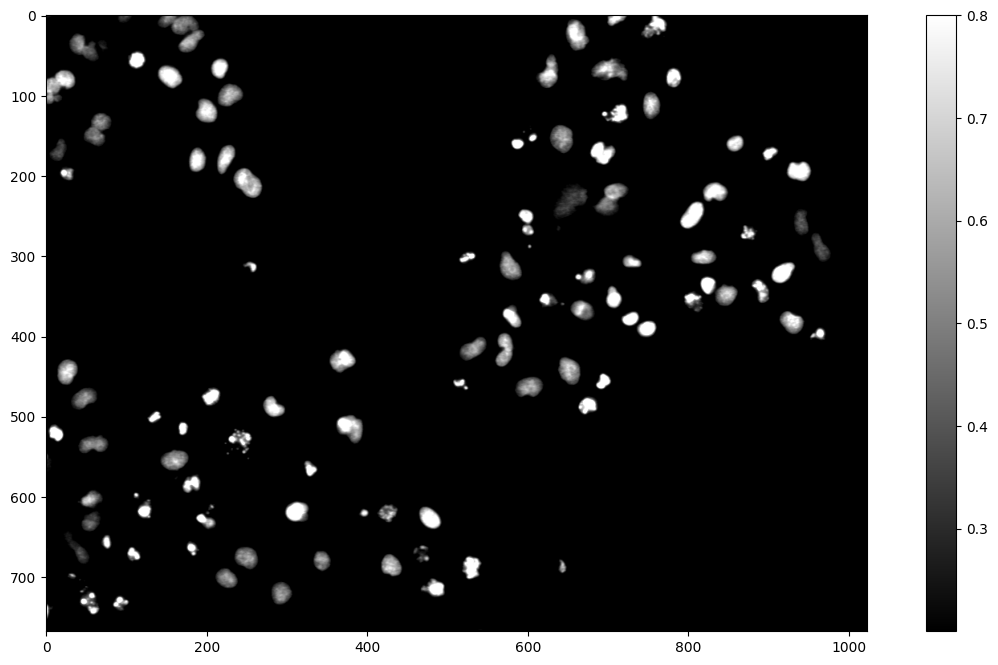

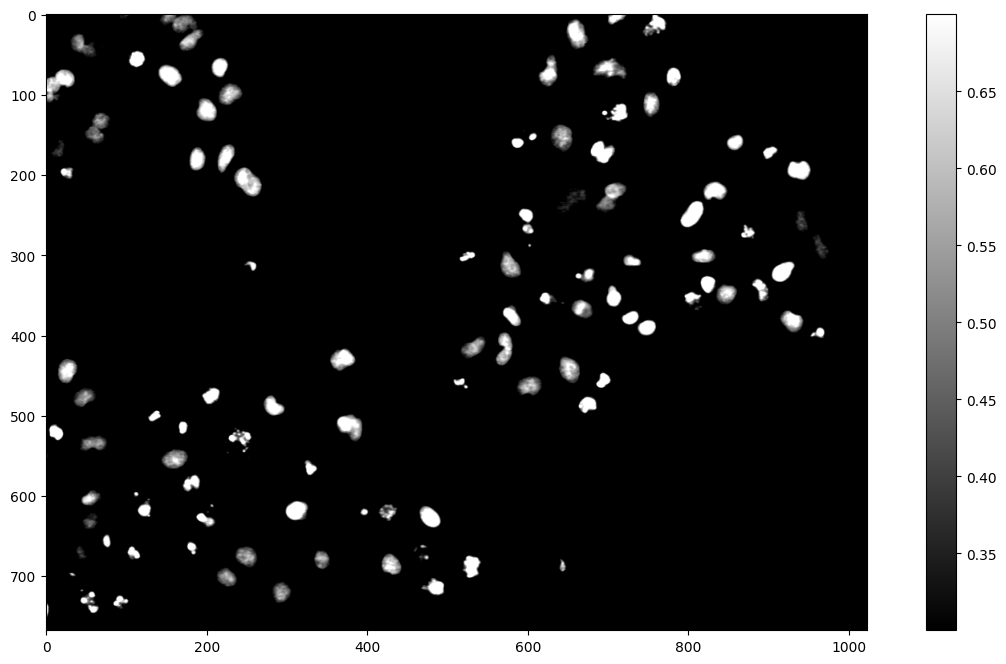

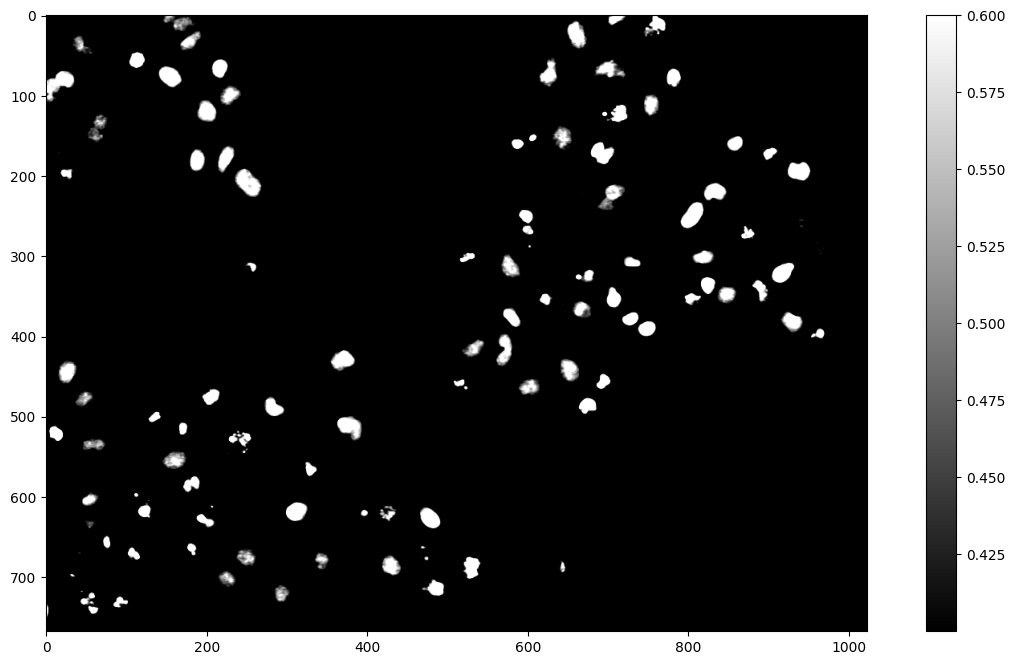

In [44]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8), "gray")
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7), "gray")
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.4, 0.6), "gray")
plt.colorbar()